# Programación declarativa @ URJC
# Programación funcional
## Curso 23-24, convocatoria ordinaria (30 de octubre de 2023)
## Campus de Vicálvaro


# Preámbulo

In [ ]:
import $ivy.`org.scalatest::scalatest:3.0.8`
import org.scalatest._

### Algunas definiciones de tipos y funciones auxiliares

In [ ]:
sealed abstract class Tree[A]
case class Empty[A]() extends Tree[A]
case class Node[A](left: Tree[A], root: A, right: Tree[A]) extends Tree[A]

object Tree{
    def void[A]: Tree[A] = Empty()
    def leaf[A](a: A): Node[A] = Node(Empty(), a, Empty())
    def right[A](a: A, tree: Tree[A]): Node[A] = Node(Empty(), a, tree)
    def left[A](tree: Tree[A], a: A): Node[A] = Node(tree, a, Empty())
    def node[A](left: Tree[A], a: A, right: Tree[A]): Node[A] = Node(left, a, right)
}

import Tree._

def foldTree[A, B](tree: Tree[A])(empty: B)(node: (B, A, B) => B): B = 
    tree match {
        case Empty() => empty
        case Node(left, root, right) => node(foldTree(left)(empty)(node), root, foldTree(right)(empty)(node))
    }

def map[A, B](tree: Tree[A])(f: A => B): Tree[B] = 
    foldTree(tree)(Empty(): Tree[B]){ 
        (leftMapped, root, rightMapped) => 
            Node(leftMapped, f(root), rightMapped)
    }

In [ ]:
object Signatures{
    abstract class List[A]{
        
        // Common HOFs
        def foldRight[B](nil: B)(cons: (A, B) => B): B
        def foldLeft[B](initial: B)(update: (B, A) => B): B
        def map[B](f: A => B): List[B]
        def flatMap[B](f: A => List[B]): List[B]
        def filter(f: A => Boolean): List[A]
        def forall(pred: A => Boolean): Boolean
        def exists(pred: A => Boolean): Boolean
 
        // Returns the number of elements of this list
        def length: Int
        
        def reverse: List[A]
    }
}

### Definiciones auxiliares sobre la correspondencia Curry-Howard y Tipos Algebraicos de Datos

In [ ]:
trait Isomorphic[A, B]{
    
    def from(a: A): B
    
    def to(b: B): A
    
    def law1(a: A): Boolean = 
        to(from(a)) == a
    
    def law2(b: B): Boolean = 
        from(to(b)) == b
}

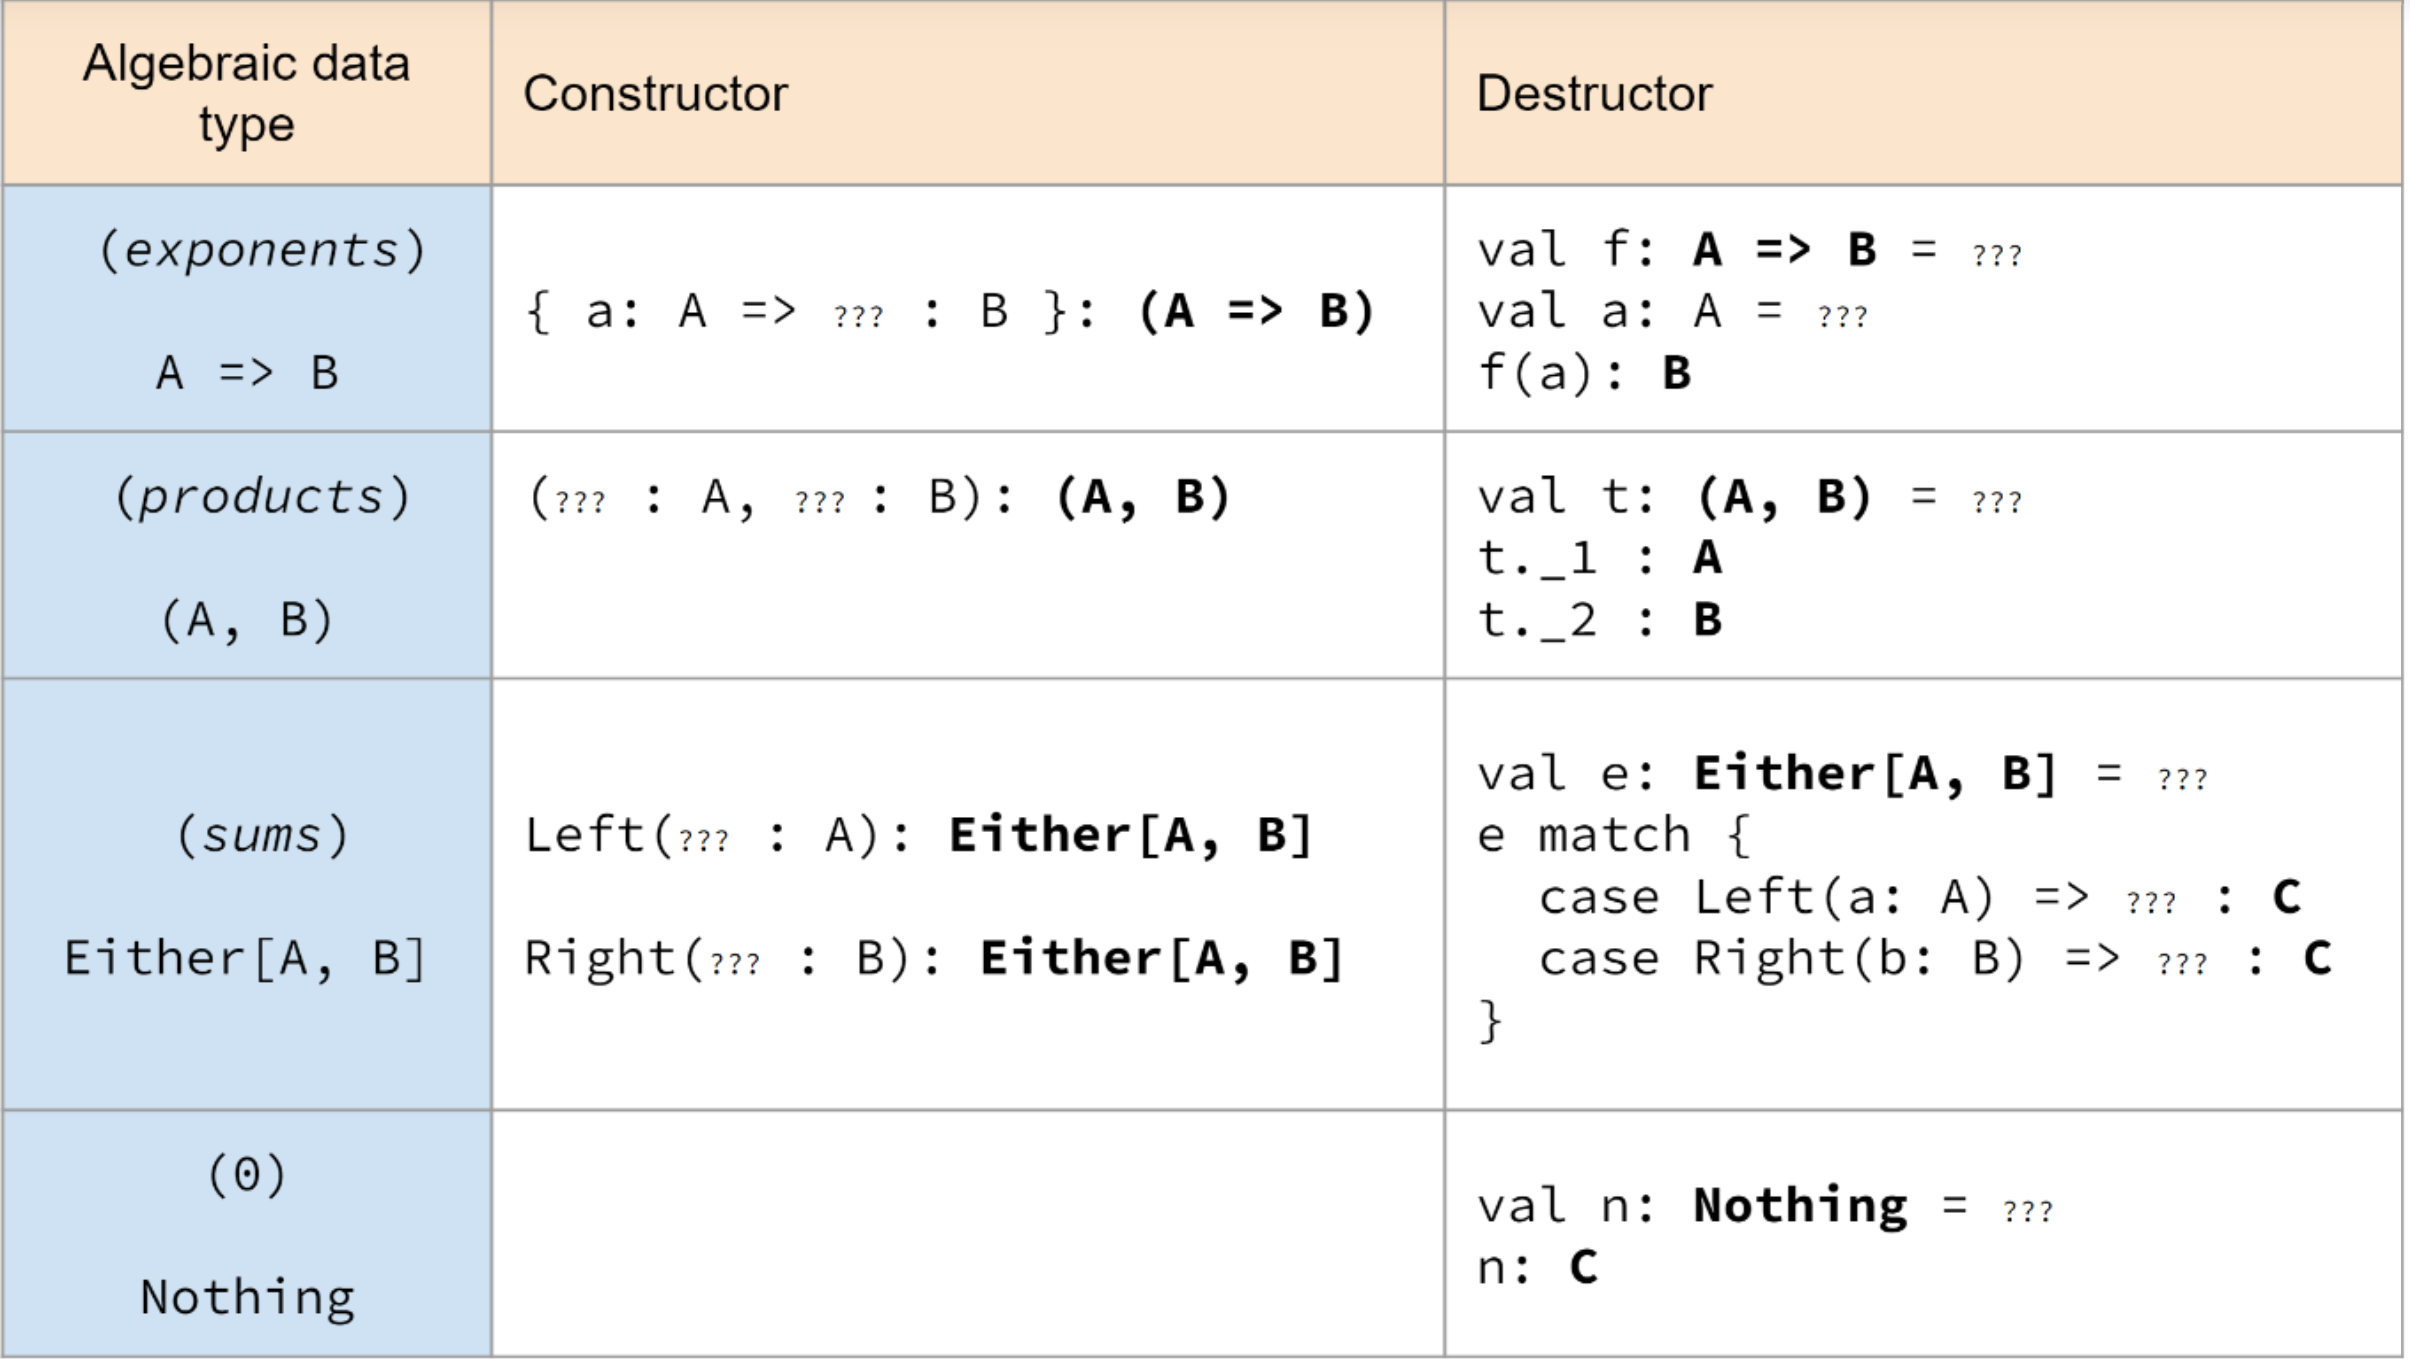

In [ ]:
type Not[P] = P => Nothing

# Ejercicio 1
__(2 puntos)__

__a) (1 punto)__ Utiliza la correspondencia de Curry-Howard para demostrar la siguiente tautología de la lógica proposicional intuicionista:

$ \vdash \neg\neg p \vee \neg\neg q  \rightarrow \neg \neg (p \vee q)$

In [ ]:
// Escribe tu solución en esta celda




__b) (1 punto)__ Se desea utilizar la correspondencia de Curry-Howard para demostrar la validez del siguiente argumento de la lógica clásica proposicional: 

$ \{p \wedge q \rightarrow r \vee s, \neg(t\wedge \neg p ),\; t,\; t \rightarrow q, q \rightarrow t\} \vdash_c \neg r \rightarrow s$

Para ello, utiliza como premisa adicional la ley del tercio excluso aplicada a la proposición $p$, es decir, demuestra la validez intuicionista del siguiente argumento lógico:

$ \{ p \vee \neg p, p \wedge q \rightarrow r \vee s, \neg(t\wedge \neg p ),\; t,\; t \rightarrow q, q \rightarrow t\} \vdash \neg r \rightarrow s$

In [ ]:
// Escribe tu solución en esta celda




# Ejercicio 2
__(1,5 puntos)__

Demuestra que, para todo tipo `A`, los tipos de datos `(Unit => Boolean) => Unit => A` y `(A, A)` son isomorfos:

In [ ]:
// Escribe tu solución en esta celda, utilizando el identificador `Iso` 
// como nombre de la clase que implementa el isomorfismo.

// class Iso[...]...



La implementación deberá satisfacer las leyes de los isomorfismos, y en particular el siguiente test:

In [ ]:
class TestIso(iso: Isomorphic[(Unit => Boolean) => Unit => Int, (Int, Int)]) extends FlatSpec with Matchers{

    "law2" should "hold" in {
        iso.law2((1,3)) shouldBe true
        iso.law2((2,4)) shouldBe true
    }

    "law1" should "hold" in {
        iso.law1(f => _ => if (f(())) 3 else 4) shouldBe true
        iso.law1(f => _ => if (f(())) 6 else 7) shouldBe true
    }
}

In [ ]:
run(new TestIso(new Iso[Int]{
    override def law1(b: (Unit => Boolean) => Unit => Int): Boolean = 
        (to(from(b))(_ => false)(()) == b(_ => false)(())) && 
        (to(from(b))(_ => true)(()) == b(_ => true)(()))
}))

# Ejercicio 3
__(3 puntos)__




La función `isSorted[A]` comprueba si una lista de elementos de tipo `A` se encuentra ordenada de acuerdo a una relación de orden `(A, A) => Boolean` dada. Por ejemplo, la función satisface los siguientes casos de prueba: 

In [ ]:
class TestSorted(isSorted: List[Int] => ((Int, Int) => Boolean) => Boolean) extends FlatSpec with Matchers{
    
    "sorted" should "work" in {
        
        isSorted(Nil)(_ < _) shouldBe true
        isSorted(List(1))(_ < _) shouldBe true
        isSorted(List(0,1))(_ < _) shouldBe true
        isSorted(List(0,1,2,3,4))(_ < _) shouldBe true
        isSorted(List(1,0))(_ < _) shouldBe false
        isSorted(List(1,2,0))(_ < _) shouldBe false
        isSorted(List(3,1,2))(_ < _) shouldBe false
    }
}

__a) (1,5 puntos)__ Implementa la función `isSorted` mediante recursión final.

In [ ]:
// Escribe tu solución en esta celda




In [ ]:
run(new TestSorted(isSorted))

__b) (1,5 puntos)__ Implementa la función `isSorted` mediante la función `foldLeft`.

In [ ]:
// Escribe tu solución en esta celda




In [ ]:
run(new TestSorted(isSorted))

# Ejercicio 4
__(3,5 puntos)__

La función `heads` recibe un árbol cuyos nodos almacenan listas de elementos, y devuelve un árbol con la misma estructura donde los nodos almacenan el primer elemento de cada lista, _siempre y cuando todas las listas de elementos almacenadas en los nodos del árbol sean no vacías_. Por ejemplo, considérense los siguientes casos de prueba:

In [ ]:
class TestHeads(heads: Tree[List[Int]] => Option[Tree[Int]]) extends FlatSpec with Matchers{
    
    "heads" should "work" in {
        heads(node(leaf(List(1,2,3)), List(5), leaf(List(10,0)))) shouldBe 
            Some(node(leaf(1), 5, leaf(10)))
        
        heads(node(leaf(Nil), List(5,3), leaf(List(10)))) shouldBe 
            None
        
        heads(node(leaf(List(1,2)), List(), leaf(List(10)))) shouldBe 
            None
        
        heads(node(leaf(List(1,2)), List(5,3), leaf(List()))) shouldBe 
            None
        
        heads(node(node(leaf(List(1,2)), List(6), leaf(List(3,4,2))), List(5), leaf(List(2,3,2)))) shouldBe 
            Some(node(node(leaf(1), 6, leaf(3)), 5, leaf(2)))        
    }
}

La función `divide` recibe un número entero y un árbol de números enteros, y devuelve un árbol con la misma estructura cuyos nodos resultan de dividir el número recibido como entrada y el número almacenado en el nodo del árbol, _siempre y cuando no exista ningún cero almacenado en algún nodo del árbol_. Por ejemplo:

In [ ]:
class TestDivide(divide: Int => Tree[Int] => Option[Tree[Int]]) extends FlatSpec with Matchers{
    
    "divide" should "work" in {
        divide(10)(node(leaf(1), 5, leaf(10))) shouldBe 
            Some(node(leaf(10), 2, leaf(1)))
        
        divide(10)(node(leaf(0), 5, leaf(10))) shouldBe 
            None
        
        divide(10)(node(leaf(1), 5, leaf(0))) shouldBe 
            None
        
        divide(10)(node(leaf(1), 0, leaf(10))) shouldBe 
            None
        
        divide(30)(node(node(leaf(1), 6, leaf(3)), 5, leaf(2))) shouldBe 
            Some(node(node(leaf(30), 5, leaf(10)), 6, leaf(15)))        
    }
    
}

Considérense las siguientes implementaciones de las funciones `heads` y `divide` basadas en un mismo patrón de diseño:

In [ ]:
def heads[A](t: Tree[List[A]]): Option[Tree[A]] = 
    t match {
        case Empty() => 
            Some(Empty())
        case Node(left, b, right) => 
            (heads(left), b match { case Nil => None; case h :: _ => Some(h) }, heads(right)) match {
                case (Some(left), Some(r), Some(right)) => 
                    Some(Node(left, r, right))
                case _ => 
                    None
            }
    }

In [ ]:
run(new TestHeads(heads))

In [ ]:
def divide(a: Int)(t: Tree[Int]): Option[Tree[Int]] = 
    t match {
        case Empty() => 
            Some(Empty())
        case Node(left, b, right) => 
            (divide(a)(left), if (b == 0) None else Some(a/b), divide(a)(right)) match {
                case (Some(left), Some(r), Some(right)) => 
                    Some(Node(left, r, right))
                case _ => 
                    None
            }
    }

In [ ]:
run(new TestDivide(divide))

__a) (1,5 puntos)__ Implementa una función de orden superior, denominada `traverse`, que encapsule el patrón de diseño utilizado en las implementaciones de las funciones `heads` y `divide`. 

In [ ]:
// Escribe tu solución en esta celda




__b) (1,5 puntos)__ Implementa de una manera más modular las funciones `heads` y `divide` mediante la función `traverse`.

In [ ]:
def heads[A](t: Tree[List[A]]): Option[Tree[A]] = 
    ???

In [ ]:
run(new TestHeads(heads))

In [ ]:
def divide(a: Int)(t: Tree[Int]): Option[Tree[Int]] = 
    ???

In [ ]:
run(new TestDivide(divide))

__c) (0,5 puntos)__ Implementa la función `traverse` mediante la función `map` sobre árboles binarios, cuya definición se puede encontrar en el preámbulo del examen, y la función `sequence` definida a continuación:

In [ ]:
def sequence[A](t: Tree[Option[A]]): Option[Tree[A]] = 
    t match {
        case Empty() =>
            Some(Empty())
        case Node(left, a, right) => 
            (sequence(left), a, sequence(right)) match {
                case (Some(left), Some(a), Some(right)) => 
                    Some(Node(left, a, right))
                case _ => 
                    None
            }
    }

In [ ]:
// Escribe tu solución en esta celda


